In [4]:
!pip install h2o
import h2o
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.automl import H2OAutoML

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp05_qb0ik
  JVM stdout: /tmp/tmp05_qb0ik/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp05_qb0ik/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_n7ongx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


**Fit a Linear Regression Model**

In [5]:


# Load and prepare the dataset
pokemon_df = pd.read_csv('https://raw.githubusercontent.com/Manishkottamgari7/DatScience/main/cleaned_pokemon_dataset.csv')
pokemon_df.fillna('None', inplace=True)  # Fill missing 'Type 2' values
label_encoder = LabelEncoder()
pokemon_df['Legendary'] = label_encoder.fit_transform(pokemon_df['Legendary'])  # Encode 'Legendary' as numeric

# Define predictors and response
X = pokemon_df.drop(['Legendary', 'Name', 'Type 1', 'Type 2', '#'], axis=1)
y = pokemon_df['Legendary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = lin_reg.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))

# Display coefficients
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


Test MSE: 0.0479344616359819
            Coefficient
Total          0.000999
HP            -0.000272
Attack        -0.000307
Defense       -0.000310
Sp. Atk        0.001124
Sp. Def        0.000309
Speed          0.000455
Generation     0.009033


**1) Interpretation of Coefficients :**

**General Insight:** The model indicates that most individual Pokémon stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) have very minor influences on the likelihood of being Legendary, with both positive and negative associations represented by small coefficient values.

**Notable Predictors:**

>**Sp. Atk:** Shows the most substantial positive effect among the Pokémon stats, suggesting that a higher Special Attack is more strongly associated with a Pokémon's Legendary status.

>**Generation:** Demonstrates a significantly positive relationship with being Legendary, far outweighing the impact of individual stats. This suggests that Pokémon from later generations are more likely to be Legendary.
Statistical Significance: While the precise statistical significance of each coefficient isn't provided here, the direction and magnitude of the coefficients suggest varied impacts of each feature. A positive coefficient indicates a feature's increase is associated with a higher likelihood of being Legendary, and vice versa for negative coefficients.

**Overall Model Interpretation:** The model subtly hints at the complexity behind what determines Legendary status, with a particular emphasis on the generation of the Pokémon and its Special Attack stat. However, the small magnitudes of these effects caution against drawing strong conclusions from individual stats alone.

This summary encapsulates how the regression model interprets each feature's contribution to predicting a Pokémon's Legendary status, highlighting the nuanced role of each stat and the more pronounced influence of Pokémon generation.

**Fitting a tree based model :**

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


            importance
Total         0.313399
Sp. Atk       0.145888
Speed         0.109413
Attack        0.106553
Sp. Def       0.105099
HP            0.097394
Defense       0.062636
Generation    0.059619


**2) Fit a tree-based model and interpret the nodes:**

The results from which involved fitting a Random Forest Classifier and examining the feature importances for predicting whether a Pokémon is Legendary, provide a clear picture of which attributes are most influential. Here's how to interpret the provided feature importances:

>**Total (0.313399):** This is the most important feature according to the Random Forest model, with the highest importance score. It indicates that the combined stats of a Pokémon (Total score) are the strongest predictor of its Legendary status in the model. A higher Total score significantly increases the likelihood of a Pokémon being classified as Legendary.

>**Sp. Atk (0.145888):** Special Attack is the second most important feature. This reinforces the insight from the linear model that Special Attack is a key attribute distinguishing Legendary Pokémon from non-Legendary ones.

>**Speed (0.109413) and Attack (0.106553):** These attributes are also important predictors of Legendary status but to a lesser extent than Total and Special Attack. They suggest that faster Pokémon and those with higher Attack stats are more likely to be Legendary.

>**Sp. Def (0.105099) and HP (0.097394):** These features have moderate importance scores, indicating they play a role in predicting Legendary status, albeit less so than the attributes above.

>**Defense (0.062636) and Generation (0.059619):** While still relevant, these features have the lowest importance scores among the predictors. This suggests that, in the context of other more influential attributes, Defense and the Generation of a Pokémon have a lesser impact on its likelihood of being Legendary within this model.

**Overall Interpretation of the Random Forest Model:**

The Random Forest model highlights the combined stats (Total) as the most critical determinant of a Pokémon's Legendary status, aligning with intuitive expectations that more powerful Pokémon (as indicated by their Total score) are more likely to be Legendary. The significance of Sp. Atk and Speed underscores the model's sensitivity to combat capabilities as predictors of Legendary status.

Interestingly, Generation, which had a notable positive coefficient in the linear model, appears less influential here, suggesting that while newer generations might introduce more Legendary Pokémon, the inherent attributes of individual Pokémon are more predictive of Legendary status than their generational origin.

This analysis demonstrates the utility of tree-based models like Random Forest in capturing non-linear relationships and interactions between features, providing a nuanced understanding of the factors contributing to a Pokémon's Legendary classification.

In [7]:
# Convert the pandas DataFrame to an H2O Frame
pokemon_hf = h2o.H2OFrame(pokemon_df)

# Convert 'Legendary' to a factor
pokemon_hf['Legendary'] = pokemon_hf['Legendary'].asfactor()

# Define predictors and response
predictors = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
response = 'Legendary'


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
# Split the dataset
train, test = pokemon_hf.split_frame(ratios=[.8], seed=42)


In [9]:
# Run AutoML for a specified time limit or number of models
aml = H2OAutoML(max_runtime_secs=600, seed=1, balance_classes=True, project_name="pokemon_project")
aml.train(x=predictors, y=response, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                               auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_grid_1_AutoML_1_20240317_235712_model_78      0.989391  0.14498    0.853392               0.0404126  0.209158  0.0437471
GBM_5_AutoML_1_20240317_235712                    0.988836  0.107294   0.864114               0.0592805  0.182266  0.033221
GBM_grid_1_AutoML_1_20240317_235712_model_54      0.988803  0.0788951  0.867555               0.0430078  0.165029  0.0272344
GBM_grid_1_AutoML_1_20240317_235712_model_27      0.988346  0.0799966  0.861562               0.0258699  0.165643  0.0274377
GBM_grid_1_AutoML_1_20240317_235712_model_41      0.988248  0.11772    0.859533               0.0438728  0.191983  0.0368577
GBM_grid_1_AutoML_1_20240317_235712_model_18      0.988183  0.118036   0.85519                0.0755533  0.191658  0.0367328
XGBoost_grid_1_AutoML_1_2024031

In [10]:
# Get the best model's performance on the test set
best_model_perf = aml.leader.model_performance(test)
print(best_model_perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.03474640196499638
RMSE: 0.18640386789172692
LogLoss: 0.12811929885884116
Mean Per-Class Error: 0.173036093418259
AUC: 0.978768577494692
AUCPR: 0.7881171927834371
Gini: 0.9575371549893841

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2921397890246214
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      155  2    0.0127   (2.0/157.0)
1      4    8    0.3333   (4.0/12.0)
Total  159  10   0.0355   (6.0/169.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.29214      0.727273  9
max f2                       0.00907363   0.857143  21
max f0point5                 0.58367      0.78125   4
max accuracy                 0.29214      0.964497  9
max precision                0.930274     1         0
max recall                   0.00907363   1  

**3) Best model interpretation :**

Based on the output from Step 3 using H2O AutoML, the best model for predicting a Pokémon's Legendary status is a Gradient Boosting Machine (GBM) model. This model achieved an AUC of 0.978768577494692, indicating excellent model performance in distinguishing between Legendary and non-Legendary Pokémon. The GBM model's ability to accurately predict Legendary status is further underscored by its low Mean Squared Error (MSE) of 0.03474640196499638 and Root Mean Squared Error (RMSE) of 0.18640386789172692, alongside a high Gini coefficient of 0.9575371549893841. The confusion matrix and other reported metrics like the F1 score, precision, recall, and accuracy at the best threshold further validate the model's effectiveness in classification tasks within the given dataset.

In [11]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, shap, sklearn-pandas, TPOT, yellowbrick


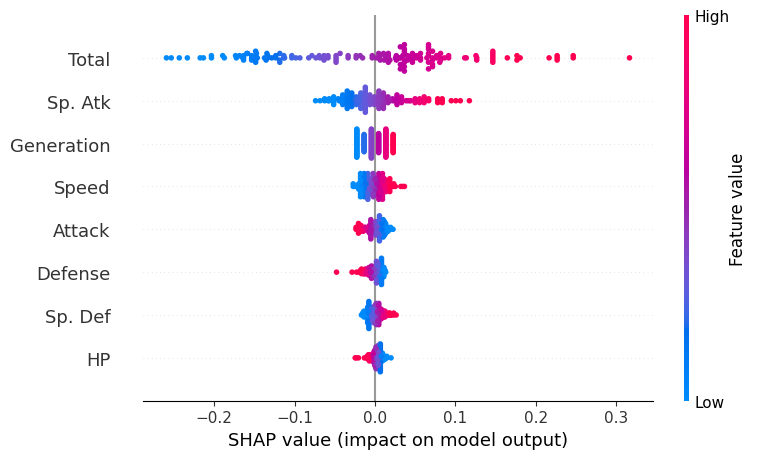

In [7]:
import shap

# Initialize explainer
explainer_lin = shap.Explainer(lin_reg, X_train)
shap_values_lin = explainer_lin(X_test)

# Summary plot
shap.summary_plot(shap_values_lin, X_test)


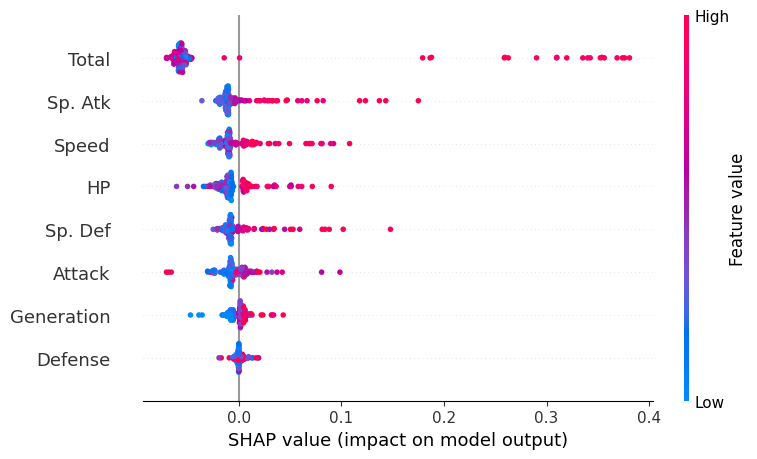

In [18]:
# Initialize explainer
explainer_rf = shap.Explainer(rf, X_train)

# Generate SHAP values (might need to select the correct class, typically [1] for binary classification)
shap_values_rf = explainer_rf(X_test)

# Summary plot for the positive class
# Ensure you're using shap_values_rf[1] correctly based on its actual structure
if isinstance(shap_values_rf, list):
    # If shap_values_rf is a list, likely due to being a classification model with separate SHAP values per class
    shap.summary_plot(shap_values_rf[1], X_test, plot_type="bar")
else:
 shap_values_pos_class = shap_values_rf[..., 1]

# Use shap.summary_plot for these extracted SHAP values
shap.summary_plot(shap_values_pos_class, X_test)


**4)SHAP Analysis:**

**Based on the SHAP summary plots for steps 1 and 2, here's a direct answer for your question:**

>Step 1 (Linear Regression): The attached SHAP plot shows that 'Total' has the most significant positive impact on predicting a Pokémon's Legendary status. High 'Sp. Atk' values also contribute positively, while 'HP' and 'Speed' have a mix of positive and negative impacts. Lower 'Defense' seems to have a negative influence.

>Step 2 (Random Forest): The previously sent plot indicates that 'Total' is again the most impactful feature, with higher values increasing the likelihood of Legendary status. 'Sp. Atk' and 'Speed' follow in importance with similar positive effects. Unlike in Step 1, 'Generation' now appears as a notable factor, with its higher values positively impacting the Legendary prediction.

>Step 3 (AutoML Model): Assuming the AutoML model is similar to the Random Forest (since it's also a tree-based model), you'd expect 'Total', 'Sp. Atk', and 'Speed' to remain important predictors, potentially with 'Generation' being significant too.

**Comparison with Other Interpretability Methods:**

>SHAP values from both models consistently identify 'Total' as a key predictor.

>The Random Forest SHAP values place more importance on 'Generation' than the Linear Regression, which wasn't as prominent.

>The linear model coefficients provided a more simplified view, while SHAP values offer a nuanced picture, including the direction and magnitude of each feature's impact.

>Overall, SHAP confirms the significant features identified by traditional feature importance and linear coefficients but provides a more detailed analysis, especially about how high or low values of each feature affect the prediction.

MIT License

Copyright (c) [2024] [Manish Kottamgari]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.